In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import SCM6
import paleoclim_leeds.hadcm3_processing as hcm3
import paleoclim_leeds.zones as zones
import cartopy.feature
import cartopy.crs as ccrs

In [2]:
temperature = hcm3.OCNYDS('xosfb', 3000, 3010).temperature(mode_t='mean', mode_lon='value', value_lon=350)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNYDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
<xarray.Dataset>
Dimensions:             (depth: 19, depth_1: 20, latitude: 144, latitude_1: 143, longitude: 288, longitude_1: 288, t: 1, unspecified: 1)
Coordinates:
  * longitude           (longitude) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * latitude            (latitude) float32 -89.375 -88.125 ... 88.125 89.375
  * depth               (depth) float32 10.0 20.0 30.0 ... 3654.3 4269.5 4884.8
  * t                   (t) object 3000-06-01 00:00:00
  * unspecified         (unspecified) float32 -1.0
  * depth_1             (depth_1) float32 5.0 15.0 25.0 ... 4577.15 5192.45
  * longitude_1         (longitude_1) float32 0.625 1.875 ... 358.125 359.375
  * latitude_1          (latitude_1) float32 -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    W_ym_dpth  

/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [349.375; 1]; lon_p: [349.375; 1]
lonb: [349.375; 1]; lonb_p: [349.375; 1]
lons: None; lons_p: None
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]; z_p: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]
zb: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]; zb_p: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]
zs: [-615.30029296875; -615.2999267578125; ...; -10.0; -10.0; 19]; zs_p: [-615.30029296875; -615.2999267578125; ...; -10.0; -10.0; 19]
t: [3000-06-01 00:00:00; 3001-06-01 00:00:00; ...; 3009-06-01 00:00:00; 3010-06-01 00:00:00; 11]
DATA: <xarray.DataArray 'temp_ym_dpth' (zb: 20, latitude: 144)>
array([[        nan,         nan,         nan, ...,         nan,
           

In [3]:
temperature.values()

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,  0.12890205,
         0.12890205,  0.12890205],
       ...,
       [        nan,         nan,         nan, ..., -1.6483775 ,
        -1.6483775 , -1.6483775 ],
       [        nan,         nan,         nan, ..., -1.6716281 ,
        -1.6716281 , -1.6716281 ],
       [        nan,         nan,         nan, ..., -1.6721282 ,
        -1.6721282 , -1.6721282 ]], dtype=float32)

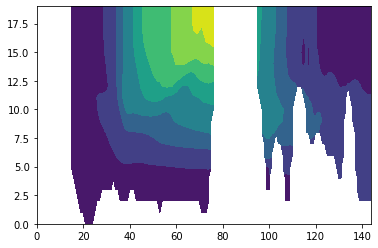

In [4]:
plt.contourf(temperature.values(processing=True))

In [5]:
temperature.zb

array([-5.19245e+03, -4.57715e+03, -3.96190e+03, -3.34665e+03,
       -2.73140e+03, -2.11615e+03, -1.50085e+03, -9.95550e+02,
       -6.66300e+02, -4.47050e+02, -3.01000e+02, -2.03700e+02,
       -1.38900e+02, -9.57500e+01, -6.70000e+01, -4.78500e+01,
       -3.51000e+01, -2.50000e+01, -1.50000e+01, -5.00000e+00],
      dtype=float32)

### ATMSURFDS

In [2]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70)
zone_n = zones.Box(lon_min=310, lat_min=50)

In [3]:
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean', zone=zone_na)
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [311.25; 315.0; ...; 333.75; 337.5; 8]; lon_p: [311.25; 315.0; ...; 333.75; 337.5; 8]
lonb: [313.125; 316.875; ...; 335.625; 339.375; 8]; lonb_p: [313.125; 316.875; ...; 335.625; 339.375; 8]
lons: [3.75; 3.75; ...; 3.75; 3.75; 12]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 12]
lat: [50.0; 52.5; ...; 67.5; 70.0; 9]; lat_p: [50.0; 52.5; ...; 67.5; 70.0; 9]
latb: [51.25; 53.75; ...; 66.25; 68.75; 8]; latb_p: [48.75; 51.25; ...; 63.75; 66.25; 8]
lats: [2.5; 2.5; ...; 2.5; 2.5; 15]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 15]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 9, longitude: 8)>
array([[249.81143, 252.88933, 255.80878, 257.9481 , 260.06473, 262.3618 ,
        264.32178, 266.31885],
       [247.96062, 251.20653, 254.10825, 256.34357, 258.5687 , 260.8615 ,
        262.7806 , 265.0222 ],
       [247.62212, 250.80063, 253.02885, 2

In [4]:
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean', zone=zone_n)
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [311.25; 315.0; ...; 352.5; 356.25; 13]; lon_p: [311.25; 315.0; ...; 352.5; 356.25; 13]
lonb: [313.125; 316.875; ...; 354.375; 358.125; 13]; lonb_p: [313.125; 316.875; ...; 354.375; 358.125; 13]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [50.0; 52.5; ...; 87.5; 90.0; 17]; lat_p: [50.0; 52.5; ...; 87.5; 90.0; 17]
latb: [51.25; 53.75; ...; 86.25; 88.75; 16]; latb_p: [48.75; 51.25; ...; 83.75; 86.25; 16]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 17, longitude: 13)>
array([[249.81143, 252.88933, 255.80878, 257.9481 , 260.06473, 262.3618 ,
        264.32178, 266.31885, 268.70447, 271.42053, 271.5078 , 271.03333,
        268.3082 ],
       [247.96062, 251.20653, 254.10825, 256.34357, 258.5687 , 260.8615 ,

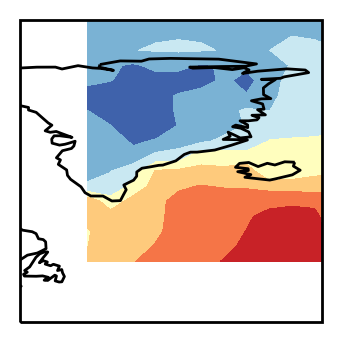

In [8]:
projection = ccrs.PlateCarree()

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon_p, sat.lat_p, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_extent([300, 350, 40, 90])

### ATMUPDS

In [12]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=30, z_max=100)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=30)

In [13]:
temperature = hcm3.ATMUPMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_na)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing atmosphere temperaure.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [313.125; 316.875; ...; 335.625; 339.375; 8]; lon_p: [313.125; 316.875; ...; 335.625; 339.375; 8]
lonb: [311.25; 315.0; ...; 333.75; 337.5; 8]; lonb_p: [311.25; 315.0; ...; 333.75; 337.5; 8]
lons: [3.75; 3.75; ...; 3.75; 3.75; 12]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 12]
lat: [51.25; 53.75; ...; 66.25; 68.75; 8]; lat_p: [48.75; 51.25; ...; 63.75; 66.25; 8]
latb: [50.0; 52.5; ...; 67.5; 70.0; 9]; latb_p: [50.0; 52.5; ...; 67.5; 70.0; 9]
lats: [2.5; 2.5; ...; 2.5; 2.5; 16]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 16]
z: [30.0; 50.0; ...; 70.0; 100.0; 4]; z_p: [30.0; 50.0; ...; 70.0; 100.0; 4]
zb: [40.0; 55.0; ...; 55.0; 75.0; 3]; zb_p: [40.0; 55.0; ...; 55.0; 75.0; 3]
zs: [15.0; 20.0; ...; 75.0; 75.0; 14]; zs_p: [15.0; 20.0; ...; 75.0; 75.0; 14]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_p' (z: 4, latitudeb: 9, longitudeb: 8)>
array([[[223.67276, 223.71492, 223.60875, 223.55933, 223.51736,
         2

In [14]:
temperature = hcm3.ATMUPMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_n)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing atmosphere temperaure.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [313.125; 316.875; ...; 354.375; 358.125; 13]; lon_p: [313.125; 316.875; ...; 354.375; 358.125; 13]
lonb: [311.25; 315.0; ...; 352.5; 356.25; 13]; lonb_p: [311.25; 315.0; ...; 352.5; 356.25; 13]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [51.25; 53.75; ...; 86.25; 88.75; 16]; lat_p: [48.75; 51.25; ...; 83.75; 86.25; 16]
latb: [50.0; 52.5; ...; 87.5; 90.0; 17]; latb_p: [50.0; 52.5; ...; 87.5; 90.0; 17]
lats: [2.5; 2.5; ...; 2.5; 2.5; 72]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 72]
z: [30.0; 50.0; ...; 925.0; 1000.0; 15]; z_p: [30.0; 50.0; ...; 925.0; 1000.0; 15]
zb: [40.0; 55.0; ...; 962.5; 1037.5; 15]; zb_p: [40.0; 55.0; ...; 962.5; 1037.5; 15]
zs: [10.0; 5.0; ...; 75.0; 75.0; 17]; zs_p: [10.0; 5.0; ...; 75.0; 75.0; 17]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_p' (z: 15, latitudeb: 17, longitudeb: 13)>
array([[[223.67276, 223.71492, 223.60875, ..., 222.

## OCNMDS

In [15]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=-205, z_max=-30)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=-205)

In [16]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_t='mean', zone=zone_na)
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 338.75; 340.0; 25]; lon_p: [310.0; 311.25; ...; 338.75; 340.0; 25]
lonb: [310.625; 311.875; ...; 338.125; 339.375; 24]; lonb_p: [310.625; 311.875; ...; 338.125; 339.375; 24]
lons: [1.25; 1.25; ...; 1.25; 1.25; 39]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 39]
lat: [50.625; 51.875; ...; 68.125; 69.375; 16]; lat_p: [50.625; 51.875; ...; 68.125; 69.375; 16]
latb: [50.0; 51.25; ...; 68.75; 70.0; 17]; latb_p: [48.75; 50.0; ...; 67.5; 68.75; 17]
lats: [1.25; 1.25; ...; 1.25; 1.25; 31]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 31]
z: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]; z_p: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]
zb: [-203.6999969482422; -138.89999389648438; ...; -47.849998474121094; -35.099998474121094; 6]; zb_p: [-301.0; -203.6999969482422; ...; -67.0; -47.849998474121094; 6]
zs: [64.80000305175781; 43.149993896484375; ...; 10.0; 10.0; 8]; zs_p: [97.30000305175781; 64.80000305175781; ...; 10.099998474121094; 10.0; 8]
t

In [17]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_t='mean', zone=zone_n)
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 357.5; 358.75; 40]; lon_p: [310.0; 311.25; ...; 357.5; 358.75; 40]
lonb: [310.625; 311.875; ...; 358.125; 359.375; 40]; lonb_p: [310.625; 311.875; ...; 358.125; 359.375; 40]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [50.625; 51.875; ...; 88.125; 89.375; 32]; lat_p: [50.625; 51.875; ...; 88.125; 89.375; 32]
latb: [50.0; 51.25; ...; 87.5; 88.75; 32]; latb_p: [48.75; 50.0; ...; 86.25; 87.5; 32]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]; z_p: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]
zb: [-203.6999969482422; -138.89999389648438; ...; -15.0; -5.0; 9]; zb_p: [-301.0; -203.6999969482422; ...; -25.0; -15.0; 9]
zs: [97.30000305175781; 64.80000305175781; ...; 10.0; 10.0; 9]; zs_p: [116.79998779296875; 97.30000305175781; ...; 10.0; 10.0; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12

## OCNYDS

In [18]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=-205, z_max=-30)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=-205)

In [19]:
temperature = hcm3.OCNMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_na)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [310.0; 311.25; ...; 338.75; 340.0; 25]; lon_p: [310.0; 311.25; ...; 338.75; 340.0; 25]
lonb: [310.625; 311.875; ...; 338.125; 339.375; 24]; lonb_p: [310.625; 311.875; ...; 338.125; 339.375; 24]
lons: [1.25; 1.25; ...; 1.25; 1.25; 39]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 39]
lat: [50.625; 51.875; ...; 68.125; 69.375; 16]; lat_p: [50.625; 51.875; ...; 68.125; 69.375; 16]
latb: [50.0; 51.25; ...; 68.75; 70.0; 17]; latb_p: [48.75; 50.0; ...; 67.5; 68.75; 17]
lats: [1.25; 1.25; ...; 1.25; 1.25; 31]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 31]
z: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]; z_p: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]
zb: [-203.6999969482422; -138.89999389648438; ...; -47.849998474121094; -35.099998474121094; 6]; zb_p: [-301.0; -203.6999969482422; ...; -67.0; -47.849998474121094; 6]
zs: [64.80000305175781; 43.149993896484375; ...; 10.0; 10.0; 8]; zs_p: [97.30000305175781; 64.80000305175781; ...; 10.099998474121094; 10.0; 8]
t

In [20]:
temperature = hcm3.OCNMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_n)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 357.5; 358.75; 40]; lon_p: [310.0; 311.25; ...; 357.5; 358.75; 40]
lonb: [310.625; 311.875; ...; 358.125; 359.375; 40]; lonb_p: [310.625; 311.875; ...; 358.125; 359.375; 40]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [50.625; 51.875; ...; 88.125; 89.375; 32]; lat_p: [50.625; 51.875; ...; 88.125; 89.375; 32]
latb: [50.0; 51.25; ...; 87.5; 88.75; 32]; latb_p: [48.75; 50.0; ...; 86.25; 87.5; 32]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]; z_p: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]
zb: [-203.6999969482422; -138.89999389648438; ...; -15.0; -5.0; 9]; zb_p: [-301.0; -203.6999969482422; ...; -25.0; -15.0; 9]
zs: [97.30000305175781; 64.80000305175781; ...; 10.0; 10.0; 9]; zs_p: [116.79998779296875; 97.30000305175781; ...; 10.0; 10.0; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12